c:\Users\khizra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 22947.3945 - mae: 102.7664 - val_loss: 19756.0332 - val_mae: 91.9709
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 19689.9492 - mae: 91.6636 - val_loss: 14520.2686 - val_mae: 74.9460
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11455.4951 - mae: 68.2521 - val_loss: 5466.5366 - val_mae: 47.3531
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2483.9524 - mae: 31.3095 - val_loss: 351.9511 - val_mae: 11.8906
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 235.3723 - mae: 9.9351 - val_loss: 200.7150 - val_mae: 9.2913
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 201.6433 - mae: 9.3692 - val_loss: 184.2953 - val_mae: 9.0575
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 186.9566 - mae: 9.1524 - val_loss: 172.7161 - val_mae: 8.7791
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 174.3182 - mae: 8.8537 - val_loss: 162.4289 - val_mae: 8.6466
Epoch 9/50
57/57 

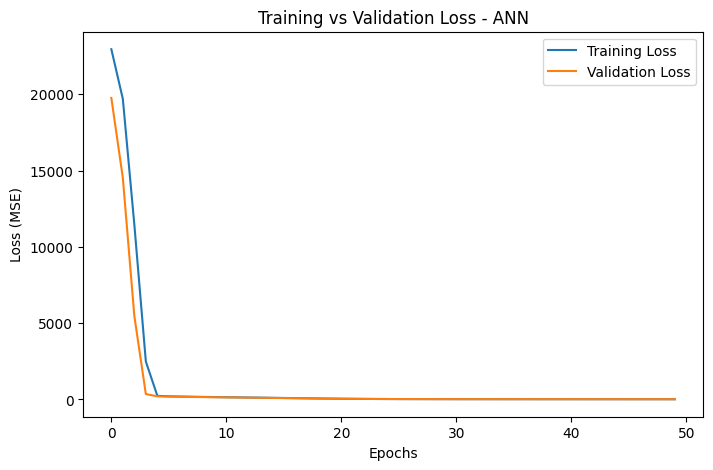

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# ================================
# 1. Load Dataset
# ================================
file_path = "TeslaStock_Dataset_Cleaned.csv"   # <-- your dataset path
df = pd.read_csv(file_path)

# Drop non-numeric columns (like Date, if present)
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])

# Features and Target
X = df.drop(columns=['Close'])   # Independent features
y = df['Close']                  # Dependent variable

# ================================
# 2. Split Data
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# 3. Scale Data
# ================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================================
# 4. Build ANN Model
# ================================
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# ================================
# 5. Train ANN
# ================================
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ================================
# 6. Evaluate Model
# ================================
y_pred = model.predict(X_test_scaled).flatten()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("ANN Performance:")
print("MAE:", mae)
print("RMSE:", rmse)

# ================================
# 7. Plot Training vs Validation Loss
# ================================
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training vs Validation Loss - ANN")
plt.legend()
plt.show()

